## Electrocardiography (ECG)

Materials are based on [Jupyter Notebooks](https://biosignalsplux.com/learn/notebooks.html) by biosignalsplux (see the [LICENSE](https://github.com/biosignalsplux/biosignalsnotebooks/blob/master/LICENSE)).

### Required packages

We will use special package created by biosignalsplux - as it is non-standard, we need to install it now:

In [ ]:
# install biosignalsplux package
!pip install biosignalsnotebooks

# install also system libraries necessary for libmagic
!apt-get install libmagic-dev

# install also BioSPPy (we will use them at the end of the lab)
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4270 sha256=6251bb70e7ed0de7cc6c87b759197bf27c18c4fca73231a4b762f9b2db99a9be
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a2aec1b2cad146b84c

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libmagic-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 105 kB of archives.
After this operation, 389 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Fetched 105 kB in 0s (1,205 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Setting up libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
# necessary imports (as before)
import numpy as np
import pandas as pd
from scipy import signal

# import also the biosignalsplux library instaled in previous cell
import biosignalsnotebooks as bsnb

# for fancy plots
import bokeh
bokeh.io.output_notebook()

### Let's load some ECG data!

The notebook uses the sample ECG signals provided by biosignalsplux. But it may be more interesting to load your own signal recorded during the class!

In [ ]:
# load sample data
data, header = bsnb.load_signal("ecg_sample", get_header=True)

# load your own signal
# data, header = bsnb.load("my_signal.txt", get_header=True)

In [ ]:
# print the data
print(f"Header:\n{str(header)}\nData:\n{str(data)}")

Header:
{'channels': array([1], dtype=int32), 'comments': '', 'date': '2017-1-17', 'device': 'biosignalsplux', 'device connection': 'BTH00:07:80:3B:46:61', 'device name': '00:07:80:3B:46:61', 'digital IO': array([0, 1], dtype=int32), 'firmware version': 772, 'resolution': array([16], dtype=int32), 'sampling rate': 200, 'sync interval': 2, 'time': '14:50:32.316', 'sensor': ['ECG'], 'column labels': {1: 'channel_1'}}
Data:
{'CH1': array([32452, 32394, 32448, ..., 33120, 33164, 33192], dtype=uint16)}


You can see that there is only one channel (`'CH1'`) and it contains ECG data (`'sensor': [b'ECG']`).

Let's plot it somehow. As you probably noticed, there is no time vector - we need to create it by hand, using provided `header['sampling rate']`.  
We will create a vector starting from 0. If you want to generate real acquisition time vector, you can use `header['date']` and `header['time']` as a starting point.

In [ ]:
raw_ecg = data["CH1"]
sr = header["sampling rate"]
ecg_len = raw_ecg.shape[0]
time = np.linspace(start=0, stop=ecg_len/sr, num=ecg_len)

**Task 1**: plot the signal in time. Do not forget to label the axes!

In [ ]:
bf = bokeh.plotting.figure(
    x_axis_label="Time [s]",
    y_axis_label="ECG [mV]",
    width=800,
    height=400
    )

bf.line(x=time, y=raw_ecg)
bokeh.plotting.show(bf)

Compare the sample data (above) with the plot below. Do you see any problems with our sample data?

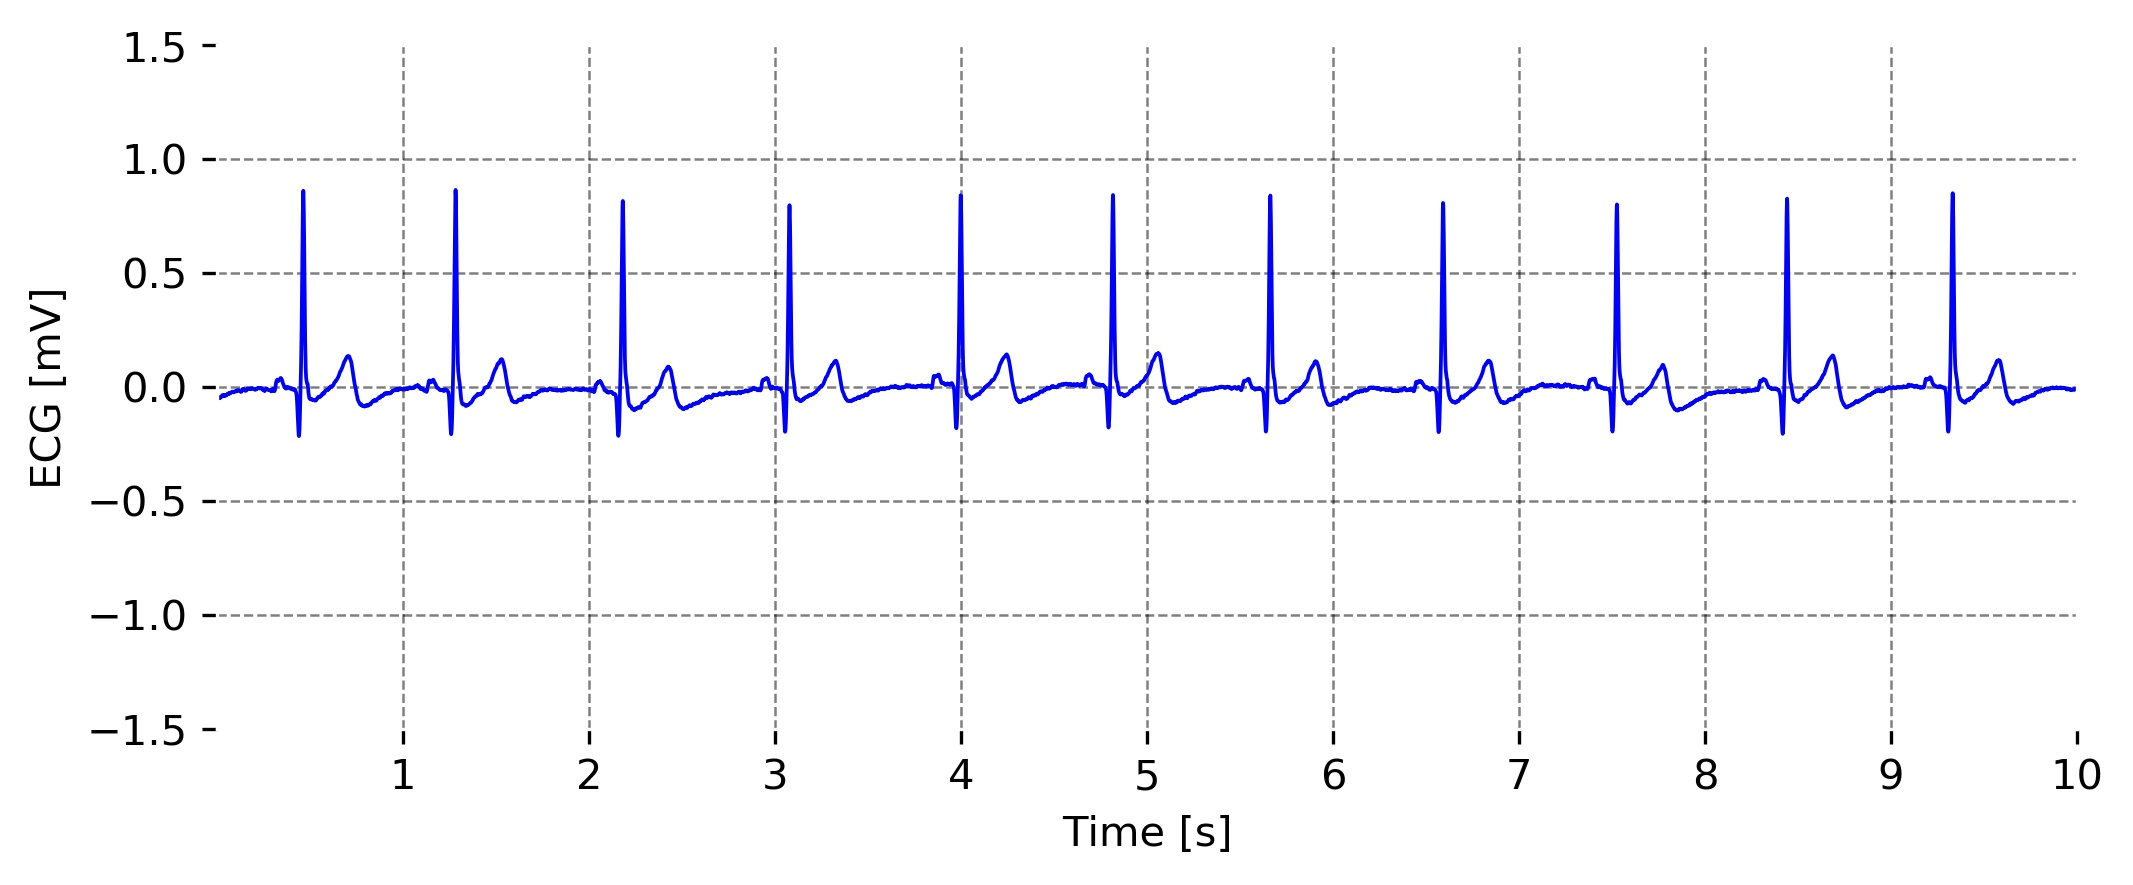

Yes, our signal **doesn't have proper units**.

It is a property of a variety of measuring devices, including biosignalsplux. They collect data in "their own units", which then need to be converted accordingly. The relevant functions can be found in the documentation.

### Unit conversion

**Task 2**: do the right conversion of sample ECG signal:

1. Read the documentation (see [docs (for sample ECG signal)](https://krzysztof.kutt.pl/didactics/psaw/ECG_Datasheet_for_Sample.pdf) or [docs (for signals recorded in class](https://krzysztof.kutt.pl/didactics/psaw/ECG_Datasheet.pdf)). On the second page, there is a transfer function that converts raw signal from analog-to-digital converter (`ADC`) to real ECG in *mV*.
2. Prepare the proper function for conversion (`convert_to_ecg(raw_signal)`) that returns the signal in *mV*.
3. Apply the function to the sample signal and plot the results (using `matplotlib` or `bokeh`)
4. Compare the new plot with the previous one. What is the difference? What changes to the signal were introduced during conversion?

In [30]:
def convert_to_ecg(raw_signal, header):
    # n is already filled by proper value (from the signal header)
    n = header["resolution"][0]
    vcc = 3.3  # napięcie referencyjne, zazwyczaj 3.3 V
    g_ecg = 1.0  # wzmocnienie (gain) dla sygnału EKG, zazwyczaj 1.0

    # Konwersja krotki na tablicę NumPy
    raw_signal_array = np.array(raw_signal)

    # Wykonanie konwersji
    ecg_signal = ((raw_signal_array / (2 ** n)) - 0.5) * (2 * vcc / g_ecg)
    return ecg_signal


In [33]:

converted_ecg = convert_to_ecg(raw_ecg,header)

bf = bokeh.plotting.figure(
    x_axis_label="Time (s)",
    y_axis_label="Voltage (mV)",
    width=800,
    height=400
)

# Rysowanie sygnału EKG
bf.line(x=time, y=converted_ecg)

# Wyświetlenie wykresu
bokeh.plotting.show(bf)

**Response (for Task 2, point 4):** `#_FILL_IN_YOUR_RESPONSE_HERE`

Nowy wykres po konwersji przedstawia sygnał EKG w bardziej czytelny sposób, umożliwiając interpretację charakterystycznych cech sygnału sercowego, takich jak rytm i morfologia fal.W widoczny sposób widać ze zakres y fali jest identyczny do przykładowego wykresu wyżej.


### Pan–Tompkins algorithm

ECG signal is very specific - it consists of a series of periodically repeating QRS complexes. Their proper detection is the basis of ECG signal analysis. Two key parameters can be then calculated from it: **HR** (Heart Rate) and **HRV** (Heart Rate Variability).

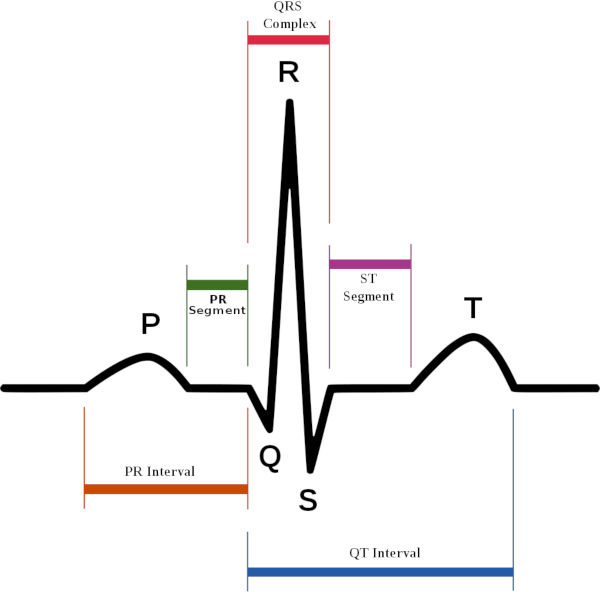

The commonly used algorithm for QRS complexes detection is Pan–Tompkins. Now, we will apply it to our sample signal!

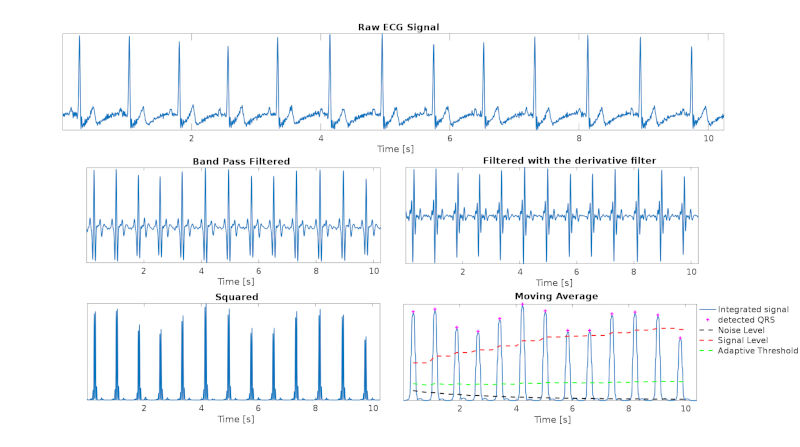

You can see an example of signal analysis using the Pan-Tompkins algorithm above (for larger image, see original [the one at Wikipedia](https://en.wikipedia.org/wiki/Pan%E2%80%93Tompkins_algorithm)). Now, we will apply all these processing steps to our signal!

In [34]:
# This is a sumplementary function for Pan-Tompkins plots
def plot_pantompkins(series1, name1, series2, name2, peaks=False):
  colors = bokeh.palettes.brewer['Paired'][3]
  bf = bokeh.plotting.figure(x_axis_label='Time (s)', y_axis_label='ECG (mV)', width=800, height=250)
  bf.line(time, series1, alpha=0.8, line_width=2, color=colors[0], legend_label=name1)
  if peaks:
    bf.circle(time, series2, alpha=0.8, size=10, color=colors[1], legend_label=name2)
  else:
    bf.line(time, series2, alpha=0.8, line_width=2, color=colors[1], legend_label=name2)
  bf.legend.click_policy="hide"
  bokeh.plotting.show(bf)

**Task 3**: apply all the steps from Pan-Tompkins algorithm - see the cells below for details (and [the description of algorithm at Wikipedia](https://en.wikipedia.org/wiki/Pan%E2%80%93Tompkins_algorithm)).

In [36]:
import scipy.signal

nyquist = 0.5 * sr  # czestotliwosc nyquista
low = 5 / nyquist #5 to dolna granica pasma
high = 15 / nyquist#15 to dolna granica pasma

b, a = scipy.signal.butter(2, [low, high], btype='band')#filtr pasmowoprzepustowy

filtered_ecg = scipy.signal.filtfilt(b, a, converted_ecg)#filtracja ekg

plot_pantompkins(converted_ecg, "ECG signal", filtered_ecg, "Filtered ECG")

In [40]:
differentiated_ecg = np.ediff1d(filtered_ecg)
plot_pantompkins(filtered_ecg, "Filtered ECG", differentiated_ecg, "Differentiated ECG")

In [41]:
squared_ecg =np.square(differentiated_ecg)
plot_pantompkins(differentiated_ecg, "Differentiated ECG", squared_ecg, "Squared ECG")

In [42]:
window_size = int(0.15 * sr)

window = np.ones(window_size)

integrated_ecg = np.convolve(squared_ecg, window, mode='same') / window_size

plot_pantompkins(squared_ecg, "Squared ECG", integrated_ecg, "Integrated ECG")


In [45]:
peaks_found = np.empty(len(converted_ecg))
peaks_found[:] = np.nan

threshold = 0.135

for x in range(1, len(integrated_ecg)-1):
   if integrated_ecg[x] > integrated_ecg[x-1] and integrated_ecg[x] > integrated_ecg[x+1] and converted_ecg[x] > threshold:
            peaks_found[x] = converted_ecg[x]

In [46]:
plot_pantompkins(converted_ecg, "ECG signal", peaks_found, "Peaks found", peaks=True)

### Tachogram

The determination of peaks is just the beginning.
Then, for each adjacent pair of R peaks, we can calculate the distance in time between them. Such a plot is called **tachogram**.

It is an interesting plot, on which we can do further analysis (known as **HRV analysis**).


**Task 4**: prepare tachogram for sample ECG signal

* I have created `peak_times` array for you - there are times (in seconds) of all peaks you have found with Pan-Tompkins algorithm
* Your task is to calculate the time difference between given peak and the previous one - store the result in `tach_values`
* To plot them in time, prepare also the `tach_times` with the peak times (as we calculate the difference between peaks, `tach_times` will be shorter than `peak_times`

Example:  
For `peak_times = [0.7, 1.5, 2.4]`  
There should be:  
`tach_times = [1.5, 2.4]`  
`tach_values = [0.8, 0.9]`

In [47]:
peak_times = np.array(time)[~np.isnan(peaks_found)]
print(peak_times)

[ 0.76032081  1.92581258  3.0212748   4.1067328   5.15217391  6.1826087
  7.15802026  8.14843816  9.13385395 10.11426762 11.08467708]


In [48]:
tach_values = [] # _FILL_IN_YOUR_CODE_HERE
tach_times = []
for idx, peak in enumerate(peaks_found):
    if not np.isnan(peak):  # Jeśli jest to szczyt
        tach_values.append(60 / time[idx])  # Obliczamy wartość tętna (60 / czas trwania od poprzedniego szczytu)
        tach_times.append(time[idx])  # Dodajemy czas wystąpienia szczytu do listy

Let's plot the tachogram (y axis should be named `Cardiac Cycle (s)`):

In [49]:
tachogram = bokeh.plotting.figure(
    x_axis_label="Time (s)",
    y_axis_label="Cardiac Cycle (s)",
    width=800,
    height=400
)

tachogram.circle(tach_times, tach_values, size=5, color='blue', legend_label='Tachogram')

tachogram.legend.location = "top_left"

bokeh.plotting.show(tachogram)

Of course, there are library functions for finding peaks and calculating tachogram - let's use the one developed by the biosignalsplux team to verify our own plot:

In [50]:
tach_values_bsnb, tach_times_bsnb = bsnb.tachogram(raw_ecg, sr, signal=True, out_seconds=True)
bf = bokeh.plotting.figure(x_axis_label='Time (s)',
                           y_axis_label='Cardiac Cycle (s)',
                           width=800,
                           height=250)
bf.line(tach_times, tach_values, legend_label='Your tachogram')
bf.line(tach_times_bsnb, tach_values_bsnb, legend_label='bsnb.tachogram', color='red')
bokeh.plotting.show(bf)

## Advanced Electrocardiography (ECG)

*This part of the notebook presents more advanced topics and is optional.*

### Heart Rate

As there are only a few peaks in the sample, there is nothing special to analyze in the above plot. Let's load a longer ECG sample for HRV analysis!

In [51]:
# load the ecg_5_min sample (5 minutes); procedure as with the first sample
data, header = bsnb.load_signal("ecg_5_min", get_header=True)
raw_ecg = data["CH1"]
sr = header["sampling rate"]
time = bsnb.generate_time(raw_ecg, sr)

# plot the data
bf = bokeh.plotting.figure(x_axis_label='Time (s)', y_axis_label='Raw Data', width=800, height=250)
bf.line(time, raw_ecg)
bokeh.plotting.show(bf)

Output hidden; open in https://colab.research.google.com to view.

Now, we will calculate the tachogram using the library function (you already know how to do it manually):

In [52]:
# we do not need to convert values to perform HRV analysis; do you know why?
tach_values, tach_times = bsnb.tachogram(raw_ecg, sr, signal=True, out_seconds=True)

In [53]:
# let's plot the tachogram
bf = bokeh.plotting.figure(x_axis_label='Time (s)', y_axis_label='Cardiac Cycle (s)', width=800, height=250)
bf.line(tach_times, tach_values)
bokeh.plotting.show(bf)

**Task 5**: Calculate the Heart Rate

* Heart rate (HR) is the number of heartbeats per minute (BPM), i.e., the number of R peaks per minute.
* As you already has the information about R-R intervals (time difference in seconds between two adjacent peaks calculated in tachogram), you can simply calculate the BPM for each peak - take the R-R interval assigned to a given peak and calculate the BPM assuming that the heartbeats would have the same intervals all the time
* Next, calculate the mean HR
* Finally, plot the HR and the mean HR using `matplotlib` or `bokeh`

In [54]:
bpm_values = [60 / rr_interval for rr_interval in tach_values]

In [55]:
mean_hr = np.mean(bpm_values)

In [58]:
bf = bokeh.plotting.figure(x_axis_label='Time (s)', y_axis_label='BPM', width=800, height=250)
bf.line(tach_times, bpm_values, legend_label="Heart Rate")
bf.line(tach_times, [mean_hr] * len(tach_times), legend_label="Mean HR")
bokeh.plotting.show(bf)

### Heart Rate Variability
There are many HRV features one can extract from tachogram. And there are also dedicated Python libraries for this task.

Let's see at the more popular library: [hrv-analysis](https://aura-healthcare.github.io/hrv-analysis/index.html)

It includes the following features (see [the docs](https://aura-healthcare.github.io/hrv-analysis/hrvanalysis.html#hrvanalysis.extract_features.get_time_domain_features) for details):

* *Time domain features*: Mean_NNI, SDNN, SDSD, NN50, pNN50, NN20, pNN20, RMSSD, Median_NN, Range_NN, CVSD, CV_NNI, Mean_HR, Max_HR, Min_HR, STD_HR
* *Geometrical domain features*: Triangular_index, TINN
* *Frequency domain features*: LF, HF, VLF, LH/HF ratio, LFnu, HFnu, Total_Power
* *Non Linear domain features*: CSI, CVI, Modified_CSI, SD1, SD2, SD1/SD2 ratio, SampEn

**Task 6**: Calculate selected HRV features!

In [59]:
!pip install hrv-analysis
import hrvanalysis

In [61]:
# Konwertowanie odstępów RR na listę interwałów RR
rr_intervals = [tach_values[i] for i in range(len(tach_values))]

# Obliczanie wybranych funkcji HRV
hrv_features = hrvanalysis.get_time_domain_features(rr_intervals)

# Wypisanie obliczonych wartości
print("Mean RR:", hrv_features["mean_nni"])
print("SDNN:", hrv_features["sdnn"])
print("RMSSD:", hrv_features["rmssd"])
print("pNN50:", hrv_features["pnni_50"])

Mean RR: 0.7767506411168555
SDNN: 0.04150831278936809
RMSSD: 0.02336722229265624
pNN50: 0.0


### BioSPPy

Of course, there are also more general libraries for signal processing.

One of the most interesting ones available in Python is [BioSPPy](https://pypi.org/project/biosppy/).

In [62]:
# import biosppy ecg
from biosppy.signals import ecg

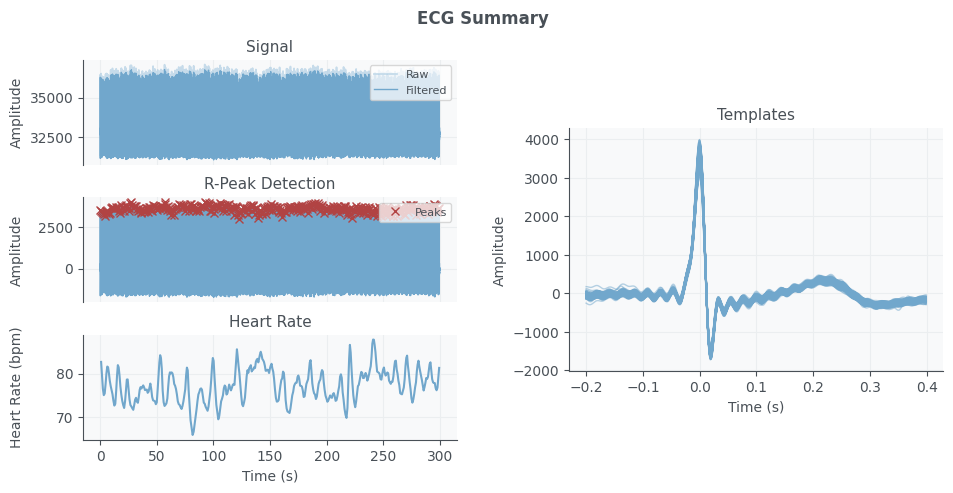

In [63]:
output = ecg.ecg(signal=raw_ecg, sampling_rate=sr, show=True)